In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # label encoder converts string to labels
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
current_loc = os.getcwd()
print(current_loc)

C:\Users\chinm\Desktop\breast_cancer


In [3]:
dataframe = pd.read_csv('data.csv')

In [4]:
dataframe.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
dataframe.set_index('id')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [7]:
dataframe.describe()
## from this we can see that the last column is null
dataframe.info()
dataframe.shape
# we just made sure that all columns has non null values except for last.. check if there are any values in the last column. the name os 'Unnamed: 32'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [8]:
dataframe['Unnamed: 32'].describe()  ## everything is null so drop it


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 32, dtype: float64

In [9]:
dataframe.drop('Unnamed: 32', inplace=True, axis=1)

In [10]:
dataframe.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# 1   diagnosis is the prediction column
dataframe.diagnosis.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [12]:
dataframe.describe()
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
pd.unique(dataframe.diagnosis) # M is the malignant , B is benign

array(['M', 'B'], dtype=object)

In [14]:
encoder = LabelEncoder()
dataframe.diagnosis = encoder.fit_transform(dataframe.diagnosis)

In [15]:
pd.unique(dataframe.diagnosis) # M is the malignant , B is benign it is usually done according to the ascending so Benign is 0 and malignant = 1

array([1, 0])

In [16]:
dataframe.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
# check if there is any na 
dataframe.isna().sum()  # proved there is nothing.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
## now we try  logistic regression before scaling

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

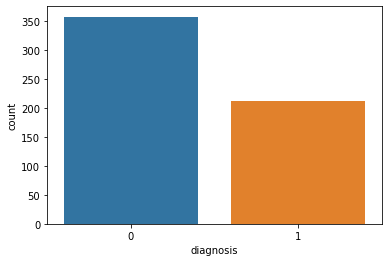

In [19]:
#now check if there is any imbalance in the data

sns.countplot(x = 'diagnosis', data = dataframe)

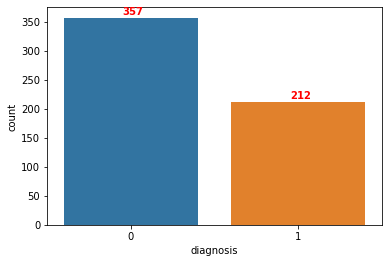

In [20]:

#plt.figure(figsize=(8,5))
ax = sns.countplot(x='diagnosis',data=dataframe)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5),fontweight='bold',color='red')

In [21]:
dataframe.drop('id', inplace=True, axis=1)

In [22]:
scaler = StandardScaler()

In [23]:

dataframe = shuffle(dataframe)

In [24]:
train_data_X = dataframe.drop('diagnosis',axis = 1)
train_data_Y = dataframe['diagnosis']


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_X, train_data_Y, test_size=0.2)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:

# %%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        40

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[74  0]
 [ 0 40]]


<AxesSubplot:>

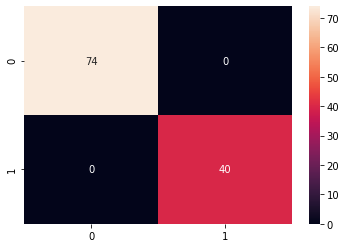

In [27]:
clf = LogisticRegression(C = 0.40, max_iter = 200)
clf.fit(X_train,Y_train)
pred_lr = clf.predict(X_test)

print(classification_report(Y_test, pred_lr))
print(confusion_matrix(Y_test, pred_lr))
sns.heatmap(confusion_matrix(Y_test, pred_lr),annot=True,fmt='.0f')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

[[74  0]
 [ 3 37]]


<AxesSubplot:>

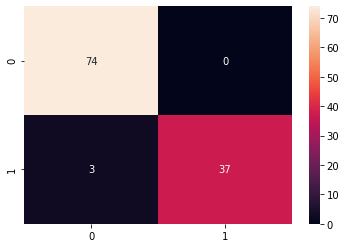

In [28]:
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_train)
pred_rfc = clf.predict(X_test)
print(classification_report(Y_test, pred_rfc))
print(confusion_matrix(Y_test, pred_rfc))
sns.heatmap(confusion_matrix(Y_test, pred_rfc),annot=True,fmt='.0f')


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

[[74  0]
 [ 2 38]]


<AxesSubplot:>

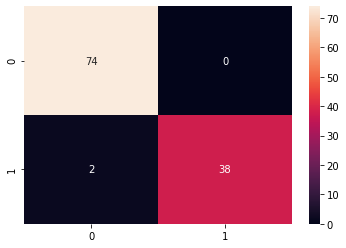

In [29]:
clf=svm.SVC()
clf.fit(X_train,Y_train)
pred_clf = clf.predict(X_test)

print(classification_report(Y_test, pred_clf))
print(confusion_matrix(Y_test, pred_clf))
sns.heatmap(confusion_matrix(Y_test, pred_clf),annot=True,fmt='.0f')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        40

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[74  0]
 [ 0 40]]


<AxesSubplot:>

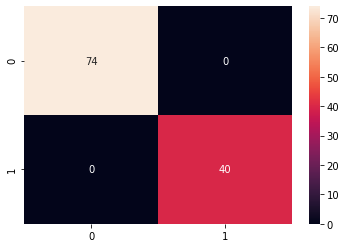

In [30]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,Y_train)
pred_mlpc = mlpc.predict(X_test)

print(classification_report(Y_test, pred_mlpc))
print(confusion_matrix(Y_test, pred_mlpc))
sns.heatmap(confusion_matrix(Y_test, pred_mlpc),annot=True,fmt='.0f')

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5600 - val_loss: 0.4231
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4060 - val_loss: 0.3093
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3110 - val_loss: 0.2337
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2441 - val_loss: 0.1789
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1979 - val_loss: 0.1407
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1645 - val_loss: 0.1161
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1406 - val_loss: 0.0990
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1238 - val_loss: 0.0852
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1121 - val_loss: 0.0751
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1034 - val_loss: 0.0680
Epoch 11/

<AxesSubplot:>

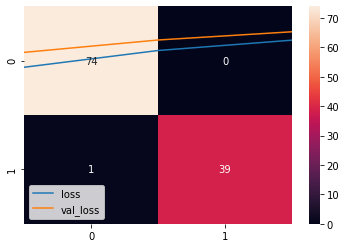

In [31]:
model = Sequential()


model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

##Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)


loss_df_drop = pd.DataFrame(model.history.history)
loss_df_drop.plot()
pred_NN = model.predict_classes(X_test)
cm_NN = accuracy_score(Y_test, pred_NN)
print(classification_report(y_true=Y_test,y_pred=pred_NN))
print(classification_report(Y_test, pred_NN))
print(confusion_matrix(Y_test, pred_NN))

sns.heatmap(confusion_matrix(Y_test,pred_NN),annot=True,fmt='.0f')


########################################


In [32]:
cm_lr = accuracy_score(Y_test, pred_lr)
cm_rfc = accuracy_score(Y_test, pred_rfc)
cm_clf = accuracy_score(Y_test, pred_clf)
cm_mlpc = accuracy_score(Y_test, pred_mlpc)


print("Testing Accuracy for")
print("logistic regression Clasification:", cm_lr)
print("Random Forest Clasification:", cm_rfc)
print("SVM Classifier:", cm_clf)
print("Basic MLP:", cm_mlpc)
print("2 layer MLP adams:", cm_NN)

logistic regression Clasification: 1.0
Random Forest Clasification: 0.9736842105263158
SVM Classifier: 0.9824561403508771
Basic MLP: 1.0
2 layer MLP adams: 0.9912280701754386
